### PROYECTO DE MACHINE LEARNING:
Por lo general los proyectos requieren de codigo ya preescrito para facilitar las tareas, funciones y ejecuciones del individuo que desea solucionar algun problema o cumolir con un objetivo basado en un base de datos. Para ello las siguientes librerias seran utilizadas en el desarrollo del proyecto.

In [2]:
# Conjunto de librerias que utilizaremos:

import pandas as pd  # Librería para manipulación y análisis de datos
import numpy as np  # Librería para operaciones numéricas y matrices
import matplotlib.pyplot as plt  # Librería para visualización de datos
import seaborn as sns  # Librería para visualización de datos estadísticos
from sklearn.preprocessing import LabelEncoder  # Para codificación de variables categóricas
from sklearn.model_selection import train_test_split  # Para dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.linear_model import LogisticRegression  # Para construir modelos de regresión logística
from sklearn.ensemble import RandomForestClassifier  # Clasificador basado en el algoritmo de bosques aleatorios
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # Métricas para evaluar modelos de clasificación
from sklearn.model_selection import GridSearchCV  # Para realizar búsqueda de hiperparámetros mediante validación cruzada
from imblearn.over_sampling import SMOTE  # Para manejar problemas de desbalance de clases mediante sobremuestreo
from sklearn.preprocessing import StandardScaler  # Para escalar características a una escala estándar
import xgboost as xgb  # Implementación optimizada de algoritmos boostings como XGBoost
from sklearn.model_selection import train_test_split, GridSearchCV  # Para dividir datos y búsqueda de hiperparámetros
from sklearn.model_selection import StratifiedKFold # Para el uso de la validación cruzada




### DESCRIPCION DEL PROYECTO: PREDECIR EL ABANDONO ESTUDINATIL Y EL EXITO ACADEMICO.
TIPO DE MODELO DE MACHINE LEARNING: CLASIFICACIÓN

Descripción del conjunto de datos: Conjunto de datos generados a partir de una institución de educación superior relacionados con estudiantes matriculados en diferentes carreras de grado, como agronomía, diseño, educación, enfermería, periodismo, administración, servicio social y tecnologías. El conjunto de datos incluye información conocida al momento de la inscripción del estudiante (trayectoria académica, demografía y factores socioeconómicos) y el desempeño académico de los estudiantes al final del primer y segundo semestre. Los datos se utilizan para construir modelos de clasificación para predecir la deserción y el éxito académico de los estudiantes. El problema se formula como una tarea de clasificación de tres categorías, en la que existe un fuerte desequilibrio hacia una de las clases.

En proyectos para la aplicacion de machine learning hay que realizar dos pasos generales que son el ANALISIS DE DATOS y la APLICACION DEL MODELO  

# ANALISIS DE DATOS

Se van a realizar una seria de modificaciones  a los datos para mejorar la compresión y procesamiento.

Cada código va a hacer explicado con el simbolo # en cada linea de código.

In [3]:
#Leemos el dataset que se llamará 'data' y traducimos el nombre de columnas al español

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/data.csv', delimiter=';')

# Diccionario de traducción: inglés -> español
traducciones = {
    "Marital status": "Estado civil",
    "Application mode": "Modo de aplicación",
    "Application order": "Orden de aplicación",
    "Course": "Curso",
    "Daytime/evening attendance": "Asistencia diurna/nocturna",
    "Previous qualification": "Calificación previa",
    "Previous qualification (grade)": "Calificación previa (nota)",
    "Nacionality": "Nacionalidad",
    "Mother's qualification": "Calificación de la madre",
    "Father's qualification": "Calificación del padre",
    "Mother's occupation": "Ocupación de la madre",
    "Father's occupation": "Ocupación del padre",
    "Admission grade": "Nota de admisión",
    "Displaced": "Desplazado",
    "Educational special needs": "Necesidades educativas especiales",
    "Debtor": "Deudor",
    "Tuition fees up to date": "Tasas de matrícula al día",
    "Gender": "Género",
    "Scholarship holder": "Becado",
    "Age at enrollment": "Edad al inscribirse",
    "International": "Internacional",
    "Curricular units 1st sem (credited)": "Unidades curriculares 1er sem (aprobadas)",
    "Curricular units 1st sem (enrolled)": "Unidades curriculares 1er sem (inscritas)",
    "Curricular units 1st sem (evaluations)": "Unidades curriculares 1er sem (evaluadas)",
    "Curricular units 1st sem (approved)": "Unidades curriculares 1er sem (aprobadas)",
    "Curricular units 1st sem (grade)": "Nota 1er sem",
    "Curricular units 1st sem (without evaluations)": "Unidades curriculares 1er sem (sin evaluación)",
    "Curricular units 2nd sem (credited)": "Unidades curriculares 2do sem (aprobadas)",
    "Curricular units 2nd sem (enrolled)": "Unidades curriculares 2do sem (inscritas)",
    "Curricular units 2nd sem (evaluations)": "Unidades curriculares 2do sem (evaluadas)",
    "Curricular units 2nd sem (approved)": "Unidades curriculares 2do sem (aprobadas)",
    "Curricular units 2nd sem (grade)": "Nota 2do sem",
    "Curricular units 2nd sem (without evaluations)": "Unidades curriculares 2do sem (sin evaluación)",
    "Unemployment rate": "Tasa de desempleo",
    "Inflation rate": "Tasa de inflación",
    "GDP": "PIB",
    "Target": "Objetivo"
}

# Renombrar columnas
data.rename(columns=traducciones, inplace=True)

# Miramos la informacon del dataset y verificar si se tradujeron las columnas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Estado civil                                    4424 non-null   int64  
 1   Modo de aplicación                              4424 non-null   int64  
 2   Orden de aplicación                             4424 non-null   int64  
 3   Curso                                           4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Calificación previa                             4424 non-null   int64  
 6   Calificación previa (nota)                      4424 non-null   float64
 7   Nacionalidad                                    4424 non-null   int64  
 8   Calificación de la madre                        4424 non-null   int64  
 9   Calificación del padre                   

El dataset nos infomrma que tenemos 4424 entradas y 37 columnas. No posee datos nulos o faltantes. Y solo una columna categorica que seria la columna de Clasificación.

In [4]:
# Observar las primeras 5 lineas de nuestro dataset
data.head()

,Estado civil,Modo de aplicación,Orden de aplicación,Curso,Daytime/evening attendance\t,Calificación previa,Calificación previa (nota),Nacionalidad,Calificación de la madre,Calificación del padre,...,Unidades curriculares 2do sem (aprobadas),Unidades curriculares 2do sem (inscritas),Unidades curriculares 2do sem (evaluadas),Unidades curriculares 2do sem (aprobadas),Nota 2do sem,Unidades curriculares 2do sem (sin evaluación),Tasa de desempleo,Tasa de inflación,PIB,Objetivo
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [5]:
# La columna 'Objetivot' es nuestra variable dependiente y la cual se va a clasificar en Desaprobado, Inscrito y Graduado; Por tanto debemos llevarla de categorica a numerica para que pueda ser procesada.
le = LabelEncoder()
data['Objetivo'] = le.fit_transform(data['Objetivo'])

# Imprimir la codificación aplicada
print("Codificación de la columna Objetivo:")
print(dict(zip(le.classes_, le.transform(le.classes_))))


Codificación de la columna Objetivo:
{'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}


In [ ]:
# Traducimos las categorias de la variable objetivo
# Diccionario de traducción
traducciones = {
    0: 'Desaprobado',
    1: 'Inscrito',
    2: 'Graduado'
}

In [6]:
# Confirmar que no quedan columnas categóricas
print("Tipos de datos después de codificar:")
print(data.dtypes)


Tipos de datos después de codificar:
Estado civil                                        int64
Modo de aplicación                                  int64
Orden de aplicación                                 int64
Curso                                               int64
Daytime/evening attendance\t                        int64
Calificación previa                                 int64
Calificación previa (nota)                        float64
Nacionalidad                                        int64
Calificación de la madre                            int64
Calificación del padre                              int64
Ocupación de la madre                               int64
Ocupación del padre                                 int64
Nota de admisión                                  float64
Desplazado                                          int64
Necesidades educativas especiales                   int64
Deudor                                              int64
Tasas de matrícula al día          

Objetivo
2    2209
0    1421
1     794
Name: count, dtype: int64


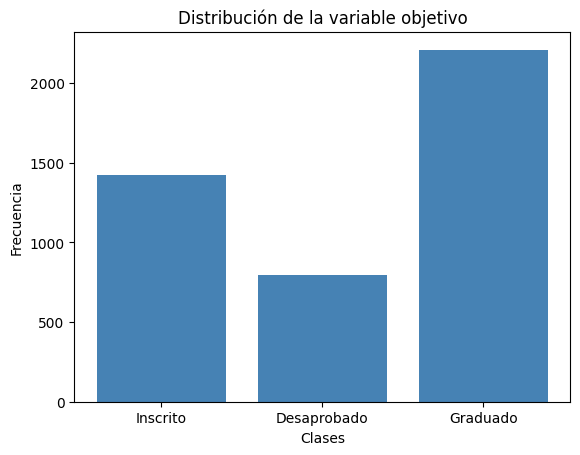

In [7]:
# Contar las observaciones en cada clase de la variable objetivo
conteo_clases = data['Objetivo'].value_counts()

# Mostrar el resultado
print(conteo_clases)

# Graficar nuevamente para visualizar la distribución


plt.bar(conteo_clases.index, conteo_clases.values, color='steelblue')
plt.title('Distribución de la variable objetivo')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.xticks(conteo_clases.index, ['Graduado', 'Inscrito', 'Desaprobado'], rotation=0)
plt.show()


### Analisis de Gráfico
 En la grafica se observa un fuerte desajuste en las clases, la columna Graduado representa más de la mitad de los resultados de la columna objetivo lo cual podría provocar desajuste del modelo de clasificación.

## Corrrelación
Correlacionamos las variables  independientes en función de la variable objetivo.

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


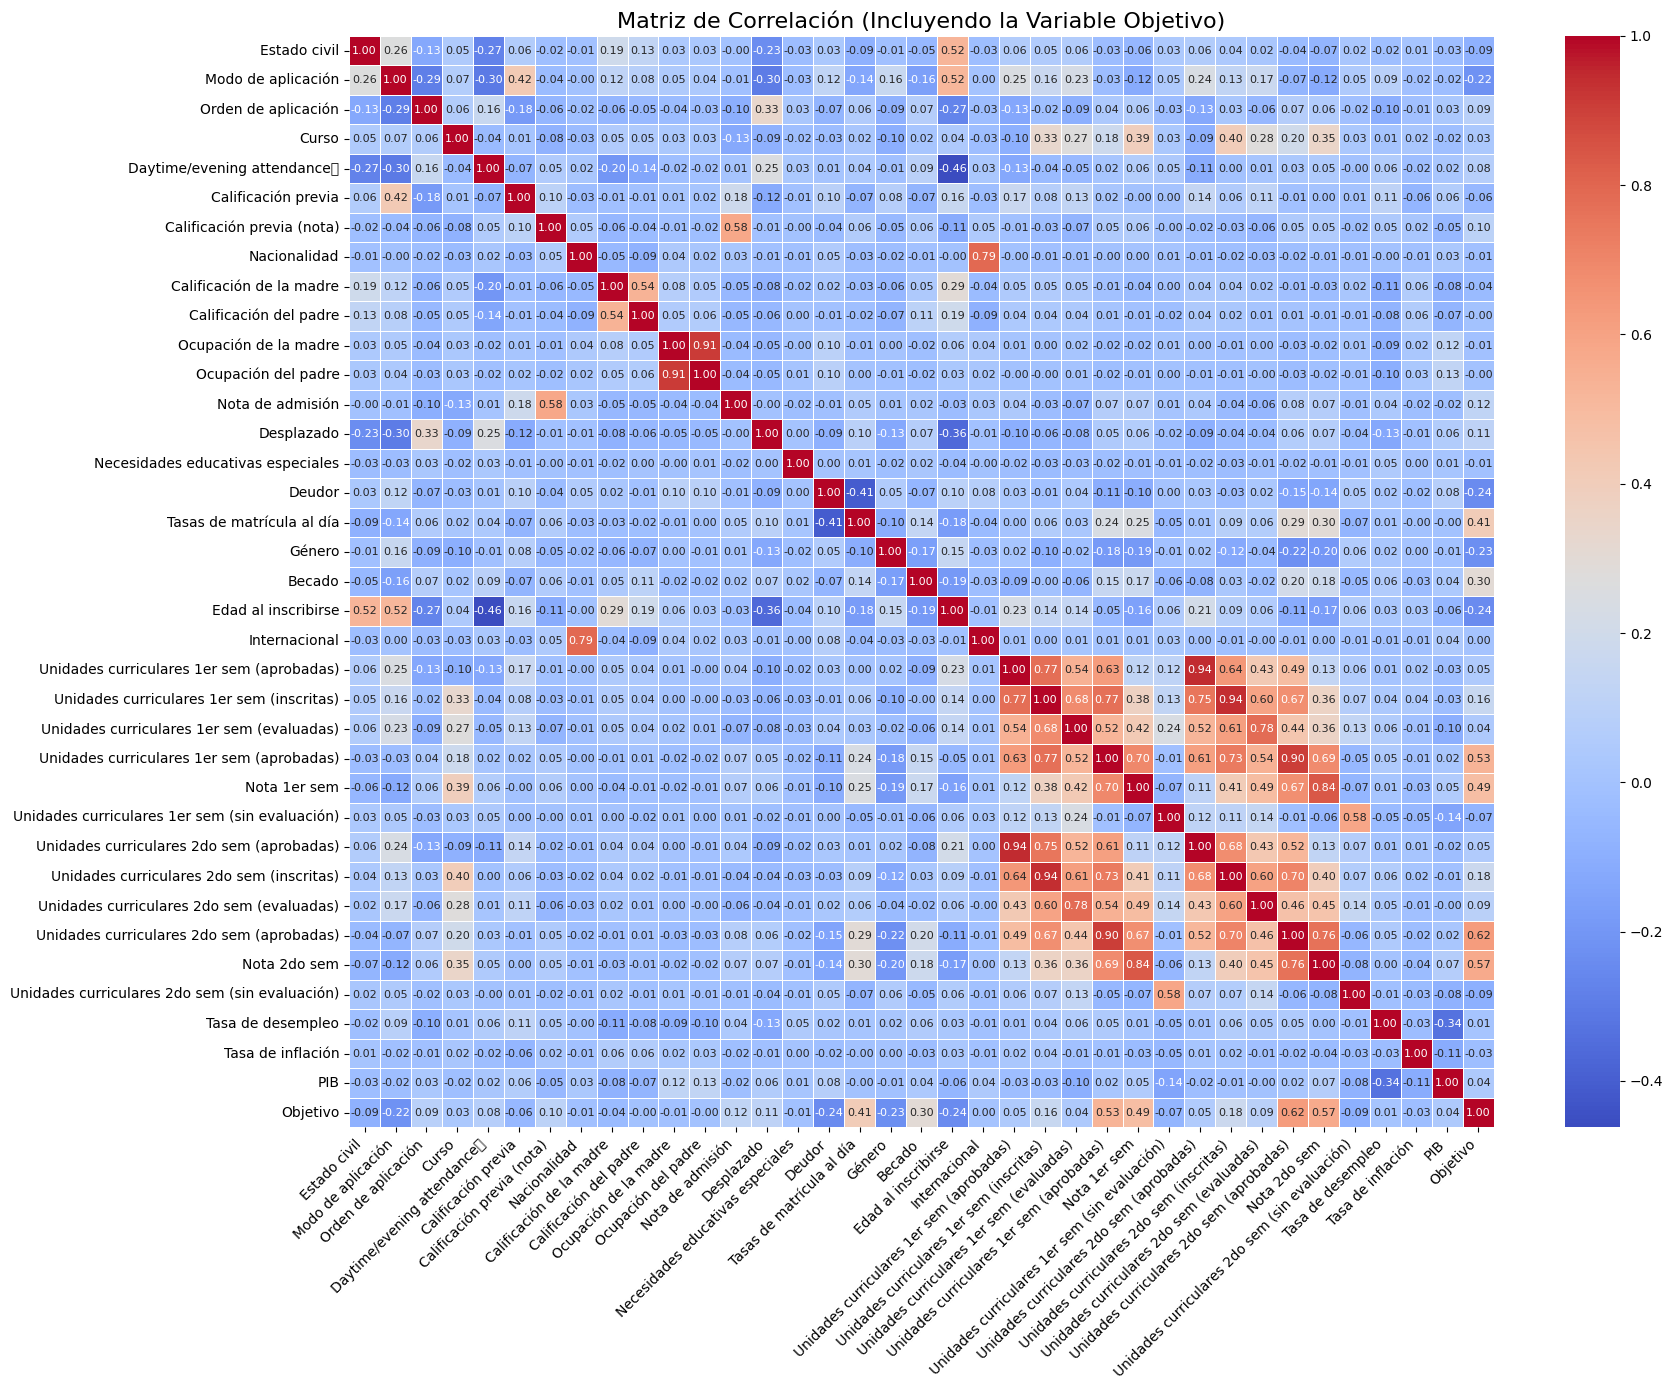

In [8]:
# Calcular la matriz de correlación
correlation_matrix = data.corr()

# Crear el heatmap con ajustes para una mejor visualización
plt.figure(figsize=(18, 14))  # Aumentar el tamaño del gráfico
sns.heatmap(correlation_matrix,
            annot=True,  # Mostrar los valores de correlación
            cmap="coolwarm",  # Elegir un mapa de colores
            fmt=".2f",  # Mostrar valores con 2 decimales
            annot_kws={"size": 8},  # Reducir el tamaño de los números
            linewidths=0.5)  # Ajustar separación entre celdas
plt.title("Matriz de Correlación (Incluyendo la Variable Objetivo)", fontsize=16)
plt.xticks(rotation=45, ha="right", fontsize=10)  # Rotar etiquetas de las columnas
plt.yticks(fontsize=10)  # Ajustar tamaño de las etiquetas de las filas
plt.tight_layout()  # Asegurarse de que el gráfico no se recorte
plt.show()


### Analisis de gráfico de Correlacion
Observamos que la mayor correlacion la encontramos entre las variables que implican asuntos academicos y notas. Este conjunto de variables son las de mayor peso para definir nuestra variable objetivo.

En el siguiente código vamos a definir las variables con menor correlacion y que serian candidatas a eliminación. asi,como las de maypor correlacion.

In [14]:
# Calcular la matriz de correlación de todo el dataset
correlation_matrix = data.corr()

# Seleccionar las correlaciones con la variable objetivo
target_correlation = correlation_matrix["Objetivo"]


# Filtrar las variables con correlación entre 0 y 0.2
low_correlation_vars = target_correlation[(target_correlation > 0) & (target_correlation <= 0.1)]

# Mostrar los nombres de las variables con baja correlación
print("Variables con correlación baja (entre 0 y 0.2) con la variable objetivo:")
print(low_correlation_vars.index.tolist())

# Mostrar las correlaciones específicas
print("\nCorrelaciones:")
print(low_correlation_vars)

# Crear una máscara para las correlaciones mayores a 0.89
high_correlation = correlation_matrix.where(abs(correlation_matrix) > 0.89)

# Eliminar los valores de la diagonal (correlaciones consigo mismas)
high_correlation = high_correlation.where(~np.eye(high_correlation.shape[0],dtype=bool))

# Mostrar las variables con correlación alta
high_correlation_pairs = high_correlation.stack().reset_index()
high_correlation_pairs.columns = ['Variable 1', 'Variable 2', 'Correlación']

# Filtrar las correlaciones por las que son mayores a 0.89
high_correlation_pairs = high_correlation_pairs[high_correlation_pairs['Correlación'].abs() > 0.89]

# Mostrar los resultados
print(high_correlation_pairs)

Variables con correlación baja (entre 0 y 0.2) con la variable objetivo:
['Orden de aplicación', 'Curso', 'Daytime/evening attendance\t', 'Internacional', 'Unidades curriculares 1er sem (aprobadas)', 'Unidades curriculares 1er sem (evaluadas)', 'Unidades curriculares 2do sem (aprobadas)', 'Unidades curriculares 2do sem (evaluadas)', 'Tasa de desempleo', 'PIB']

Correlaciones:
Orden de aplicación                          0.089791
Curso                                        0.034219
Daytime/evening attendance\t                 0.075107
Internacional                                0.003934
Unidades curriculares 1er sem (aprobadas)    0.048150
Unidades curriculares 1er sem (evaluadas)    0.044362
Unidades curriculares 2do sem (aprobadas)    0.054004
Unidades curriculares 2do sem (evaluadas)    0.092721
Tasa de desempleo                            0.008627
PIB                                          0.044135
Name: Objetivo, dtype: float64
                                  Variable 1  \
0 

Nota: Durante pruebas iniciales realizadas antes de este notebook se eliminaron las columnas que obtuvieron un resultado menor a 0.2 al realiar esta acccion el algoritmo mostraba un rendimiento menor por tanto no sé tomo la decisión de eliminarlas para el actual notebook.

Las Columnas Ocupacion de la Madre y del Padre estan altamante relacionadas al igual que algunas columnas de unidades curriculares, estas eran candidatas para ser combinadas y generar una data promediada.

Al igual que como ocurrio con las variables candidatas a eliminar, los modelos mostraron un mejor desempeño sin afectar los datos y metricas propios del dataset. Por tanto, se decidio no combinar las variables.

###Analisis General
Podemos inferir que el datatset no presenta mayores desviaciones que ameriten modificaciones de columnas o datos. Dado esto, se procede a continuacion con apliacion de diferentes modelos de clasificación algoritmica.

###DIVISIÓN DE DATOS DE ENTRENAMIENTO Y PRUEBA  

En este paso definiremos que va a hacer "X" y que va a ser "Y". Divideremos los datos de entrenamiento trabajando el modelo en un 80% para ***entrenamiento*** y 20% para ***prueba***.
Ademas aplicaremos el ***scaler*** para escalar los datos y no trabajar con valores muy lejanos o que haya mucha distancia entre valores mayores y menores.

In [16]:
# Separar características y columna objetivo
X = data.drop('Objetivo', axis=1)
y = data['Objetivo']

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos (opcional)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# APLICACIÓN DE MODELOS DE CLASIFICACIÓN PARA MACHINE LEARNING

##Modelo de Regresión Logística  y Modelo Random Forest

In [ ]:
# Modelo de Regresión Logística
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Evaluación de Regresión Logística
print("Resultados de Regresión Logística:")
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))
print("Precisión de Regresión Logística:", accuracy_score(y_test, y_pred_logreg))

# Modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluación de Random Forest
print("\nResultados de Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Precisión de Random Forest:", accuracy_score(y_test, y_pred_rf))


Resultados de Regresión Logística:
[[244  27  45]
 [ 35  42  74]
 [ 14  24 380]]
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       316
           1       0.45      0.28      0.34       151
           2       0.76      0.91      0.83       418

    accuracy                           0.75       885
   macro avg       0.68      0.65      0.66       885
weighted avg       0.73      0.75      0.74       885

Precisión de Regresión Logística: 0.752542372881356

Resultados de Random Forest:
[[244  23  49]
 [ 34  46  71]
 [  9  25 384]]
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       316
           1       0.49      0.30      0.38       151
           2       0.76      0.92      0.83       418

    accuracy                           0.76       885
   macro avg       0.70      0.67      0.67       885
weighted avg       0.75      0.76      0.75       885

Precisión de Random Forest: 0

Observamos un rendimiento en la precisión de Regresión logística del 0.75 y para Random Forest 0.76; Valores que no son bajos pero que si necesitan subir la precisión.

### Aplicacion de Smote y grid_search para optimizar los modelos



In [ ]:


# Balanceo de clases con SMOTE (opcional)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


# Regresión Logística
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_resampled, y_resampled)
y_pred_logreg = logreg.predict(X_test)

# Evaluación de Regresión Logística
print("Resultados de Regresión Logística:")
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))
print("Precisión de Regresión Logística:", accuracy_score(y_test, y_pred_logreg))

# Optimización de hiperparámetros con GridSearch para Random Forest

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_resampled, y_resampled)

print("Mejores hiperparámetros:", grid_search.best_params_)

# Random Forest con mejores hiperparámetros
rf = grid_search.best_estimator_
rf.fit(X_resampled, y_resampled)
y_pred_rf = rf.predict(X_test)

# Evaluación de Random Forest
print("\nResultados de Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Precisión de Random Forest:", accuracy_score(y_test, y_pred_rf))


Resultados de Regresión Logística:
[[229  59  28]
 [ 28  78  45]
 [ 17  58 343]]
              precision    recall  f1-score   support

           0       0.84      0.72      0.78       316
           1       0.40      0.52      0.45       151
           2       0.82      0.82      0.82       418

    accuracy                           0.73       885
   macro avg       0.69      0.69      0.68       885
weighted avg       0.76      0.73      0.74       885

Precisión de Regresión Logística: 0.7344632768361582
Mejores hiperparámetros: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}

Resultados de Random Forest:
[[235  42  39]
 [ 24  69  58]
 [ 11  36 371]]
              precision    recall  f1-score   support

           0       0.87      0.74      0.80       316
           1       0.47      0.46      0.46       151
           2       0.79      0.89      0.84       418

    accuracy                           0.76       885
   macro avg       0.71      0.70      0.70      

Los resultados nos muestran que la optimizacion no aumneto la presición de ninguno de los dos modelos. Por lo tanto vamos a acudir a un nuevo modelo y aplicarlo.

###Aplicación de Modelo XGBoost

In [25]:
# Ajustar hiperparámetros relacionados con la regularización y el peso de clases
param_dist_regularization = {
    'n_estimators': [400, 500, 600],
    'max_depth': [8, 9, 10],
    'learning_rate': [0.05, 0.06, 0.07],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9],
    'gamma': [0.1, 0.2, 0.3],  # Incrementar regularización
    'min_child_weight': [1, 2],
    'reg_alpha': [0.1, 0.2, 0.3],  # Regularización L1
    'reg_lambda': [2, 3, 4],       # Regularización L2
    'scale_pos_weight': [1, 2, 3]  # Ajustar peso de clases
}

# Nueva búsqueda de hiperparámetros con enfoque en regularización
random_search_regularization = RandomizedSearchCV(
    estimator=XGBClassifier(random_state=42, eval_metric='mlogloss'),
    param_distributions=param_dist_regularization,
    n_iter=50,  # Exploración más detallada
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Entrenar modelo con los datos balanceados (ADASYN)
random_search_regularization.fit(X_train_balanced, y_train_balanced)

# Evaluar el mejor modelo
best_xgb_model_regularization = random_search_regularization.best_estimator_
y_pred_regularization = best_xgb_model_regularization.predict(X_test)

# Resultados
best_params_regularization = random_search_regularization.best_params_
conf_matrix_regularization = confusion_matrix(y_test, y_pred_regularization)
class_report_regularization = classification_report(y_test, y_pred_regularization)
accuracy_regularization = accuracy_score(y_test, y_pred_regularization)

best_params_regularization, conf_matrix_regularization, class_report_regularization, accuracy_regularization


Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:00:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


({'subsample': 0.8,
  'scale_pos_weight': 1,
  'reg_lambda': 2,
  'reg_alpha': 0.1,
  'n_estimators': 500,
  'min_child_weight': 1,
  'max_depth': 10,
  'learning_rate': 0.07,
  'gamma': 0.1,
  'colsample_bytree': 0.9},
 array([[238,  36,  42],
        [ 31,  64,  56],
        [ 11,  28, 379]]),
 '              precision    recall  f1-score   support\n\n           0       0.85      0.75      0.80       316\n           1       0.50      0.42      0.46       151\n           2       0.79      0.91      0.85       418\n\n    accuracy                           0.77       885\n   macro avg       0.71      0.69      0.70       885\nweighted avg       0.76      0.77      0.76       885\n',
 0.7694915254237288)

###Configurar validación cruzada estratificada al modelo XGBoost

In [26]:
# Configurar validación cruzada estratificada
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inicializar métricas
accuracy_scores = []
conf_matrices = []
classification_reports = []

for train_index, val_index in skf.split(X_train_balanced, y_train_balanced):
    X_train_fold, X_val_fold = X_train_balanced[train_index], X_train_balanced[val_index]
    y_train_fold, y_val_fold = y_train_balanced[train_index], y_train_balanced[val_index]

    # Entrenar el modelo
    xgb_model = XGBClassifier(
        random_state=42,
        eval_metric='mlogloss',
        **best_params_regularization  # Utilizamos los mejores parámetros obtenidos previamente
    )
    xgb_model.fit(X_train_fold, y_train_fold)

    # Predecir en el conjunto de validación
    y_val_pred = xgb_model.predict(X_val_fold)

    # Calcular métricas
    accuracy_scores.append(accuracy_score(y_val_fold, y_val_pred))
    conf_matrices.append(confusion_matrix(y_val_fold, y_val_pred))
    classification_reports.append(classification_report(y_val_fold, y_val_pred, output_dict=True))

# Calcular promedio de precisión
mean_accuracy = sum(accuracy_scores) / len(accuracy_scores)

# Imprimir resultados
print("Precisión media de la validación cruzada estratificada:", mean_accuracy)
print("\nÚltima matriz de confusión:")
print(conf_matrices[-1])
print("\nÚltimo reporte de clasificación:")
print(classification_report(y_val_fold, y_val_pred))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:04:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:04:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:05:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:05:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:05:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weigh

Precisión media de la validación cruzada estratificada: 0.8648793565683647

Última matriz de confusión:
[[299  38  29]
 [ 25 333  36]
 [ 14  21 324]]

Último reporte de clasificación:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       366
           1       0.85      0.85      0.85       394
           2       0.83      0.90      0.87       359

    accuracy                           0.85      1119
   macro avg       0.86      0.85      0.85      1119
weighted avg       0.86      0.85      0.85      1119



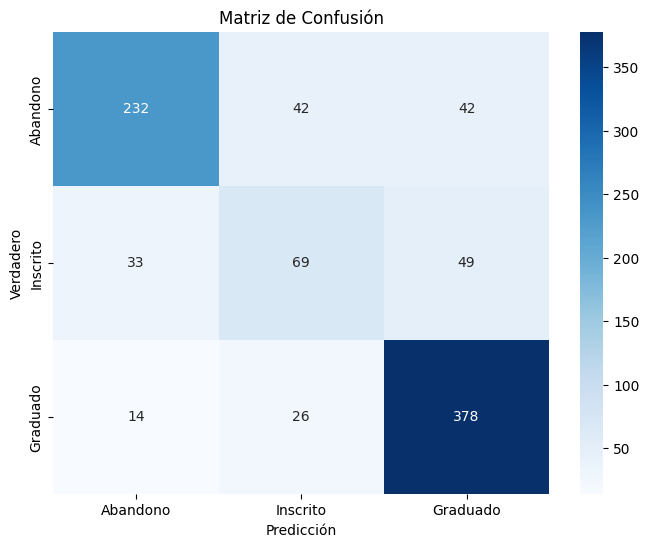

In [36]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Nombres de las clases
clases = ['Abandono', 'Inscrito', 'Graduado']  # Ajusta según corresponda

# Visualizar la matriz de confusión como un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clases, yticklabels=clases)
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.title("Matriz de Confusión")
plt.show()


Al observar la matriz de confusion se observa que en la clase inscrita la prediccion aun es deficiente pero en terminos de resultado del modelo es aceptable el accuracy por tanto se pueden realizar predicciones.

### PREDICCIONES
Realizar Predicciones Después de entrenar el modelo, podemos usar el método predict() para hacer predicciones en el conjunto de datos de prueba. Esto nos permite ver cómo se comporta el modelo con datos que no vio durante el entrenamiento.

In [28]:
y_pred = best_xgb_model.predict(X_test)  # Usamos el método 'predict' en lugar de llamar el objeto
print("Predicciones en el conjunto de prueba:", y_pred[:10])  # Primeras 10 predicciones



Predicciones en el conjunto de prueba: [0 2 2 2 0 1 2 2 2 2]


### Predicción para 100 filas de datos

In [30]:
# Separar características y etiquetas verdaderas
X = data.drop(columns=["Objetivo"])  # Reemplaza "Objetivo" con la columna de la etiqueta en tu dataset
y = data["Objetivo"]

# Seleccionamos las primeras 100 filas como ejemplo de nuevas muestras
nuevas_muestras_df = data.iloc[:100].drop(columns=["Objetivo"])
valores_verdaderos = data.iloc[:100]["Objetivo"]

# 1. Escalar las nuevas muestras utilizando el scaler ya ajustado
nuevas_muestras_escaladas = scaler.transform(nuevas_muestras_df)

# 2. Realizar predicciones
predicciones = best_xgb_model.predict(nuevas_muestras_escaladas)

# 3. Comparar predicciones con valores verdaderos
print("Predicciones:", predicciones.tolist())
print("Valores Verdaderos:", valores_verdaderos.tolist())

# 4. Calcular métricas de desempeño
print("\nMétricas de Desempeño:")
print("Precisión:", accuracy_score(valores_verdaderos, predicciones))
print("Matriz de Confusión:")
print(confusion_matrix(valores_verdaderos, predicciones))
print("Reporte de Clasificación:")
print(classification_report(valores_verdaderos, predicciones))





Predicciones: [0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 2, 1, 2, 2, 1, 1, 1, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 1, 0, 0, 1, 2, 2, 2, 2, 1, 1, 0, 2, 0, 0, 2, 1, 2, 2, 1, 0]
Valores Verdaderos: [0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 1, 2, 2, 2, 2, 2, 1, 1, 2, 0, 2, 0, 0, 2, 1, 2, 2, 1, 1, 1, 0, 2, 2, 0, 1, 1, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 1, 2, 2, 2, 2, 1, 1, 0, 2, 0, 0, 2, 1, 2, 2, 1, 0]

Métricas de Desempeño:
Precisión: 0.93
Matriz de Confusión:
[[28  1  0]
 [ 2 16  4]
 [ 0  0 49]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        29
           1       0.94      0.73      0.82        22
           2       0.92      1.00      0.96        49

    accuracy          

In [31]:
# Diccionario para mapear etiquetas a descripciones
label_mapping = {
    0: 'Desaprobado',
    1: 'Inscrito',
    2: 'Graduado'
}

# Seleccionar 20 datos para predecir
X_sample = X_test[:20]  # Cambia esto si quieres seleccionar de otro conjunto
y_true_sample = y_test[:20]

# Realizar las predicciones
y_pred_sample = best_xgb_model.predict(X_sample)

# Convertir etiquetas a descripciones
y_true_labels = [label_mapping[label] for label in y_true_sample]
y_pred_labels = [label_mapping[label] for label in y_pred_sample]

# Mostrar las predicciones junto con las etiquetas verdaderas
print("Predicciones y valores verdaderos:\n")
for i in range(20):
    print(f"Dato {i+1}:")
    print(f"  Valor Verdadero: {y_true_labels[i]}")
    print(f"  Predicción: {y_pred_labels[i]}\n")


Predicciones y valores verdaderos:

Dato 1:
  Valor Verdadero: Desaprobado
  Predicción: Desaprobado

Dato 2:
  Valor Verdadero: Graduado
  Predicción: Graduado

Dato 3:
  Valor Verdadero: Graduado
  Predicción: Graduado

Dato 4:
  Valor Verdadero: Graduado
  Predicción: Graduado

Dato 5:
  Valor Verdadero: Desaprobado
  Predicción: Desaprobado

Dato 6:
  Valor Verdadero: Graduado
  Predicción: Inscrito

Dato 7:
  Valor Verdadero: Inscrito
  Predicción: Graduado

Dato 8:
  Valor Verdadero: Desaprobado
  Predicción: Graduado

Dato 9:
  Valor Verdadero: Graduado
  Predicción: Graduado

Dato 10:
  Valor Verdadero: Graduado
  Predicción: Graduado

Dato 11:
  Valor Verdadero: Graduado
  Predicción: Desaprobado

Dato 12:
  Valor Verdadero: Graduado
  Predicción: Graduado

Dato 13:
  Valor Verdadero: Desaprobado
  Predicción: Graduado

Dato 14:
  Valor Verdadero: Graduado
  Predicción: Graduado

Dato 15:
  Valor Verdadero: Desaprobado
  Predicción: Graduado

Dato 16:
  Valor Verdadero: Inscri

### RESUMEN:

El siguiente codigo está en construccion

In [39]:
import pickle
pickle.dump(xgb_model,open('/content/drive/MyDrive/Colab Notebooks/data/cristian/model_cristian.pkl','wb'))#aqui va el nombre codigo de prediccion